<a href="https://colab.research.google.com/github/Khaoula1025/Classification-d-Images-avec-un-R-seau-Neuronal/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chargement et pr√©paration des donn√©es

### 1. Charger Fashion MNIST via Tensorflow.keras.datasets.

In [ ]:
import tensorflow as tf
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
26421880/26421880 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
5148/5148 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step
4422102/4422102 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 0us/step


### 2. Inspecter dimensions, classes.

In [ ]:
import numpy as np

print("Training set:",  X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)
print("Labels uniques :", np.unique(y_train))
class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

for i, name in enumerate(class_names):
    print(i, "‚Üí", name)


Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)
Labels uniques : [0 1 2 3 4 5 6 7 8 9]
0 ‚Üí T-shirt/top
1 ‚Üí Trouser
2 ‚Üí Pullover
3 ‚Üí Dress
4 ‚Üí Coat
5 ‚Üí Sandal
6 ‚Üí Shirt
7 ‚Üí Sneaker
8 ‚Üí Bag
9 ‚Üí Ankle boot


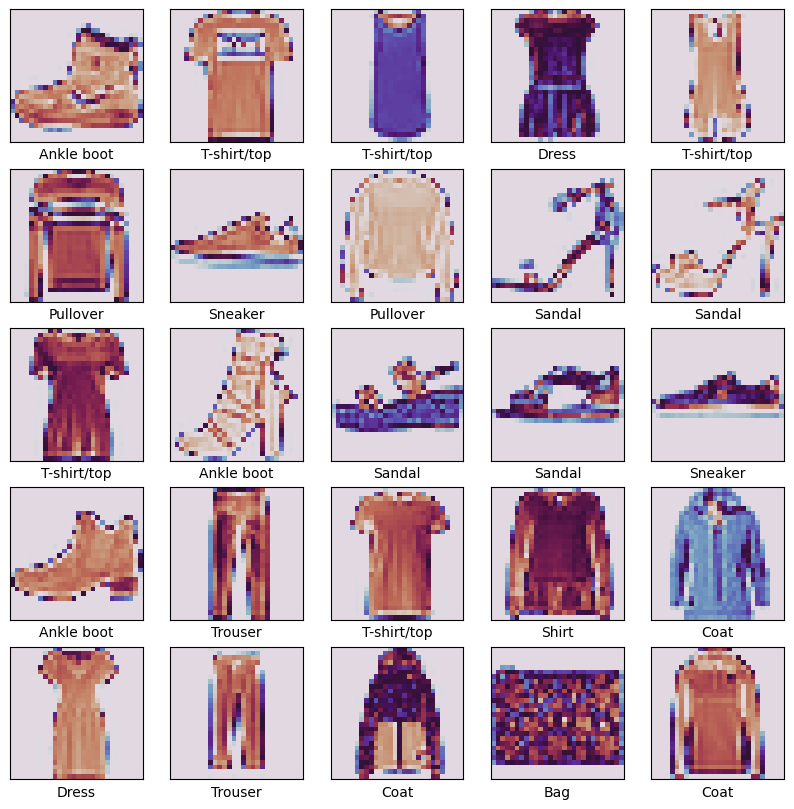

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='twilight')
    plt.xlabel(class_names[y_train[i]])
plt.show()

### 3. Normaliser les pixels (diviser par 255 ‚Üí valeurs dans [0,1]).

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0


# Construction du mod√®le

In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compiler

In [ ]:
model.compile(
          optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy']
              )
model.summary()

### Train model

### EarlyStopping

In [ ]:
# early stopping code
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)
# avec early stopping
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stop])


Epoch 1/10
1500/1500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 2ms/step - accuracy: 0.7695 - loss: 0.6605 - val_accuracy: 0.8554 - val_loss: 0.4098
Epoch 2/10
1500/1500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 3ms/step - accuracy: 0.8619 - loss: 0.3874 - val_accuracy: 0.8589 - val_loss: 0.3800
Epoch 3/10
1500/1500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8731 - loss: 0.3493 - val_accuracy: 0.8761 - val_loss: 0.3574
Epoch 4/10
1500/1500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8839 - loss: 0.3165 - val_accuracy: 0.8674 - val_loss: 0.3627
Epoch 5/10
1500/1500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 3ms/step - accuracy: 0.8877 - loss: 0.3023 - val_accuracy: 0.8837 - val_loss: 0.3226
Epoch 6/10
1500/1500 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 2ms/step - accuracy: 0.8950 - loss: 0.2800 - val_accuracy: 0.8831

### Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.2f}")

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step - accuracy: 0.8858 - loss: 0.3577
Test accuracy: 0.89


# Documentation et synth√®se

### üîπ Hyperparam√®tres test√©s
| Param√®tre          | Valeur                            | Raison du choix                                             |
| ------------------ | --------------------------------- | ----------------------------------------------------------- |
| Optimizer          | `adam`                            | rapide convergence, ajustement automatique du learning rate |
| Loss               | `sparse_categorical_crossentropy` | adapt√©e aux labels entiers                                  |
| Activation cach√©es | `relu`                            | efficace pour √©viter vanishing gradient                     |
| Activation sortie  | `softmax`                         | donne des probabilit√©s par classe                           |
| Batch size         | 128                               | bon compromis entre rapidit√© et stabilit√©                   |
| Epochs             | 10                                | suffisant pour convergence sans surapprentissage            |


### sparse_categorical_crossentropy vs categorical_crossentropy

* Utilise sparse_categorical_crossentropy quand tes labels sont des entiers (0‚Äì9 pour Fashion MNIST).

* Utilise categorical_crossentropy quand tes labels sont encod√©s en one-hot.

 => Dans le projet Fashion MNIST, les labels sont d√©j√† des entiers (0‚Äì9), donc on choisit sparse_categorical_crossentropy.